In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.optimizers import Adam

In [114]:
pwd

'C:\\Users\\caspe\\Downloads\\Dissertation'

In [36]:
df = pd.read_excel("LFB_dataset.xlsx")
(df.head())

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,000008-01012018,2018-01-01,2018,00:04:25,0,False Alarm,AFA,NaN,Non Residential,Mosque,...,348.0,Finchley,NaN,NaN,1.0,1.0,1,60,328,1.0
1,000009-01012018,2018-01-01,2018,00:04:30,0,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,...,144.0,Beckenham,NaN,NaN,1.0,1.0,1,60,328,1.0
2,000010-01012018,2018-01-01,2018,00:04:34,0,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,232.0,Southgate,NaN,NaN,1.0,1.0,1,60,328,1.0
3,000011-01012018,2018-01-01,2018,00:04:58,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,22.0,Enfield,NaN,NaN,1.0,1.0,1,60,328,1.0
4,000014-01012018,2018-01-01,2018,00:07:47,0,Fire,Primary Fire,NaN,Road Vehicle,Car,...,241.0,Stratford,NaN,NaN,1.0,1.0,1,60,328,6.0


In [37]:
df_copy = df.copy()

In [38]:
df_copy2 = df.copy()

In [39]:
# Check the structure of the dataset
df.info()

# Get basic statistics of the dataset
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713368 entries, 0 to 713367
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          713368 non-null  object        
 1   DateOfCall                              713368 non-null  datetime64[ns]
 2   CalYear                                 713368 non-null  int64         
 3   TimeOfCall                              713368 non-null  object        
 4   HourOfCall                              713368 non-null  int64         
 5   IncidentGroup                           713368 non-null  object        
 6   StopCodeDescription                     713368 non-null  object        
 7   SpecialServiceType                      249623 non-null  object        
 8   PropertyCategory                        713368 non-null  object        
 9   PropertyType                         

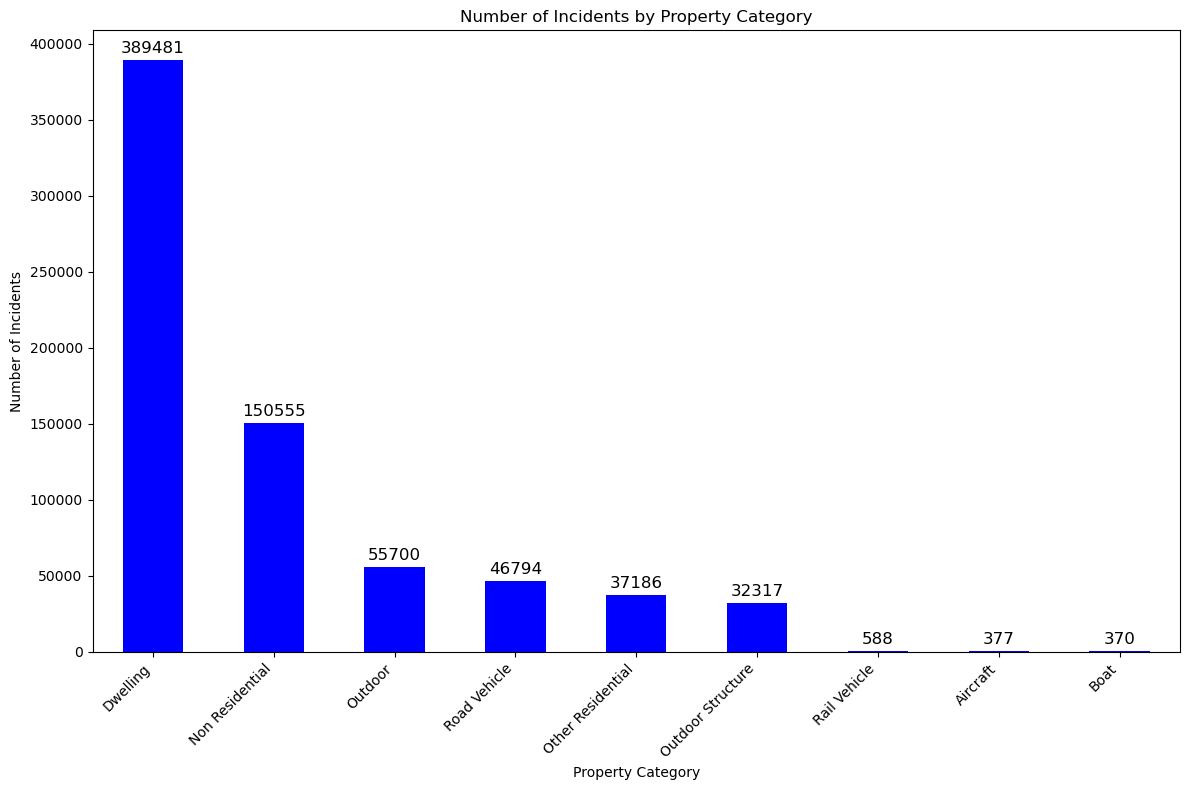

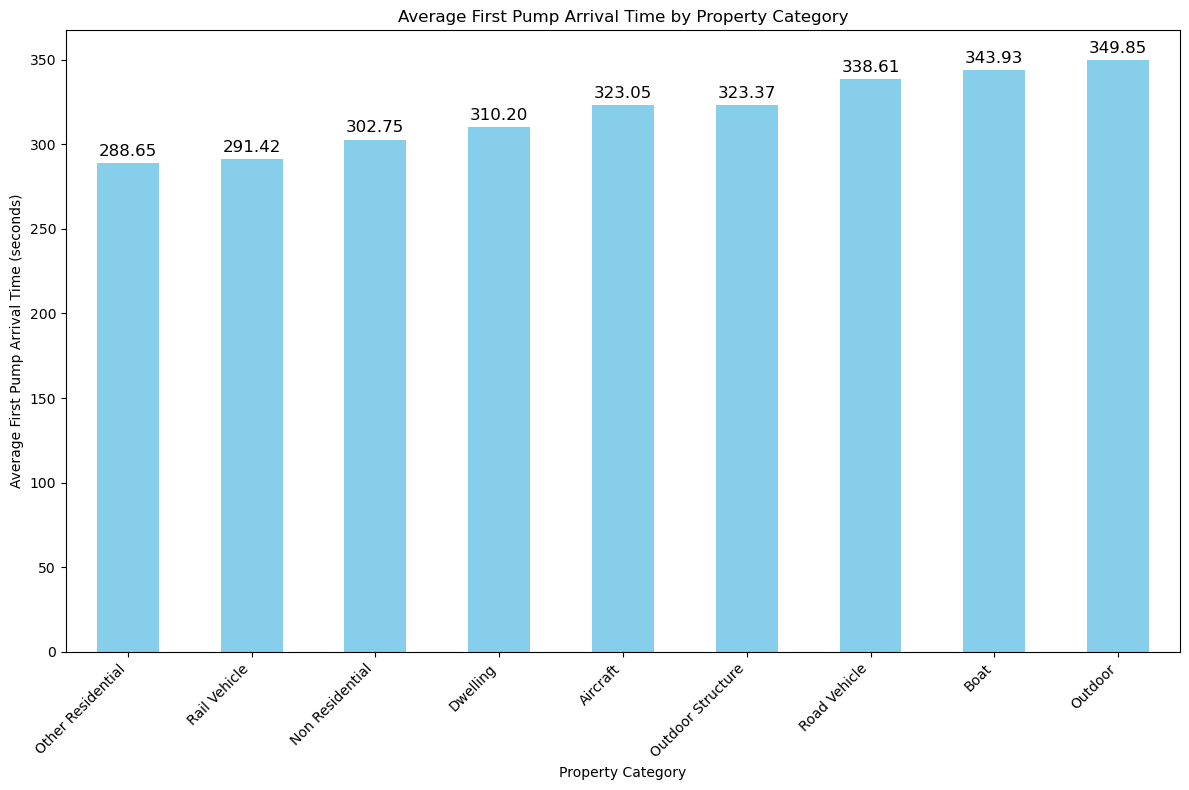

In [40]:
# Group by PropertyCategory and count the number of incidents
incident_counts = df['PropertyCategory'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = incident_counts.plot(kind='bar', color='blue')

# Add titles and labels
plt.title('Number of Incidents by Property Category')
plt.xlabel('Property Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')

# Add the figures to each of the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, padding=3)

plt.tight_layout()
plt.show() # Show the plot

# Convert FirstPumpArriving_AttendanceTime to numeric, coerce errors to NaN
df['FirstPumpArriving_AttendanceTime'] = pd.to_numeric(df['FirstPumpArriving_AttendanceTime'], errors='coerce')

# Group by PropertyCategory and calculate the mean of FirstPumpArriving_AttendanceTime
avg_response_time = df.groupby('PropertyCategory')['FirstPumpArriving_AttendanceTime'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = avg_response_time.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Average First Pump Arrival Time by Property Category')
plt.xlabel('Property Category')
plt.ylabel('Average First Pump Arrival Time (seconds)')
plt.xticks(rotation=45, ha='right')

# Add the figures to each of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3, fmt='%.2f')

plt.tight_layout()

# Show the plot
plt.show()


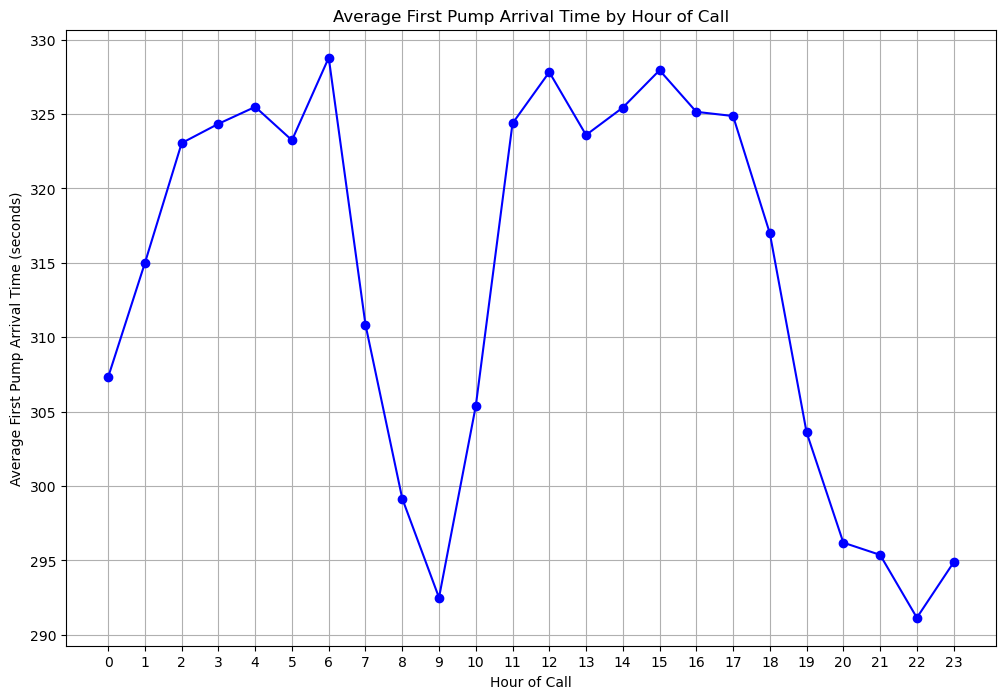

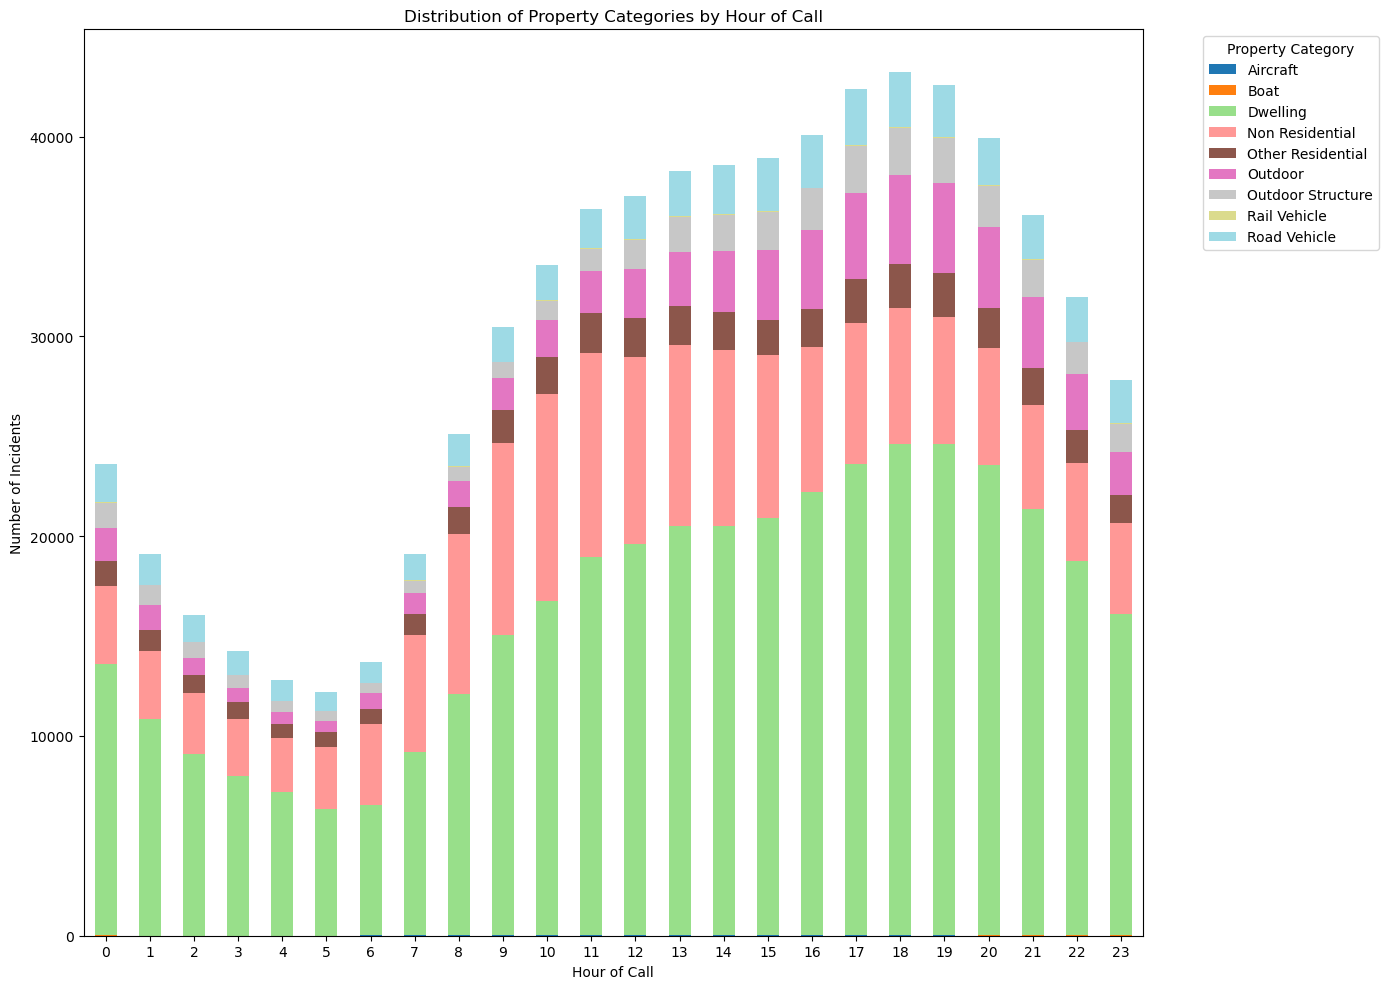

In [41]:
# Group by HourOfCall and calculate the mean of FirstPumpArriving_AttendanceTime
avg_response_time_by_hour = df.groupby('HourOfCall')['FirstPumpArriving_AttendanceTime'].mean().sort_index()

# Create a line plot
plt.figure(figsize=(12, 8))
plt.plot(avg_response_time_by_hour.index, avg_response_time_by_hour.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average First Pump Arrival Time by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Average First Pump Arrival Time (seconds)')
plt.xticks(range(0, 24))
plt.grid(True)

# Group by HourOfCall and PropertyCategory and count the incidents
hourly_property_counts = df.groupby(['HourOfCall', 'PropertyCategory']).size().unstack().fillna(0)
# Create a stacked bar plot
plt.figure(figsize=(14, 10))
hourly_property_counts.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')

# Add titles and labels
plt.title('Distribution of Property Categories by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.legend(title='Property Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

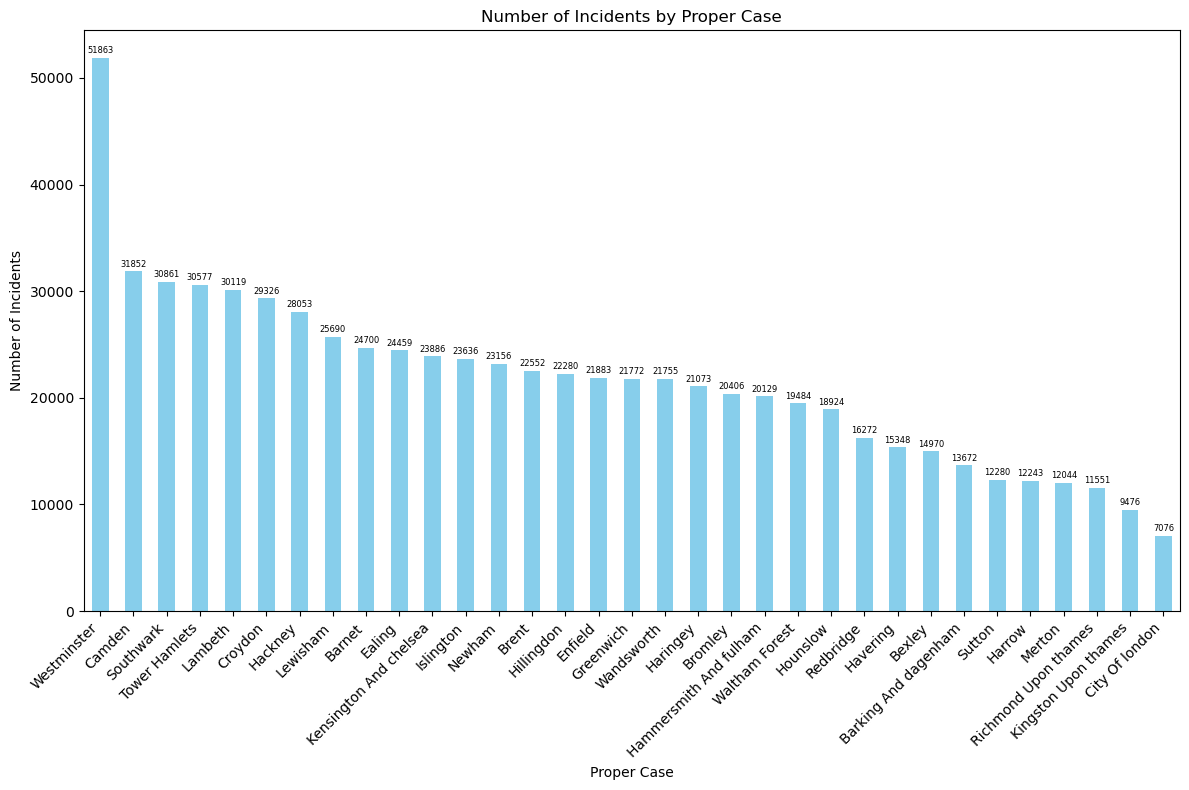

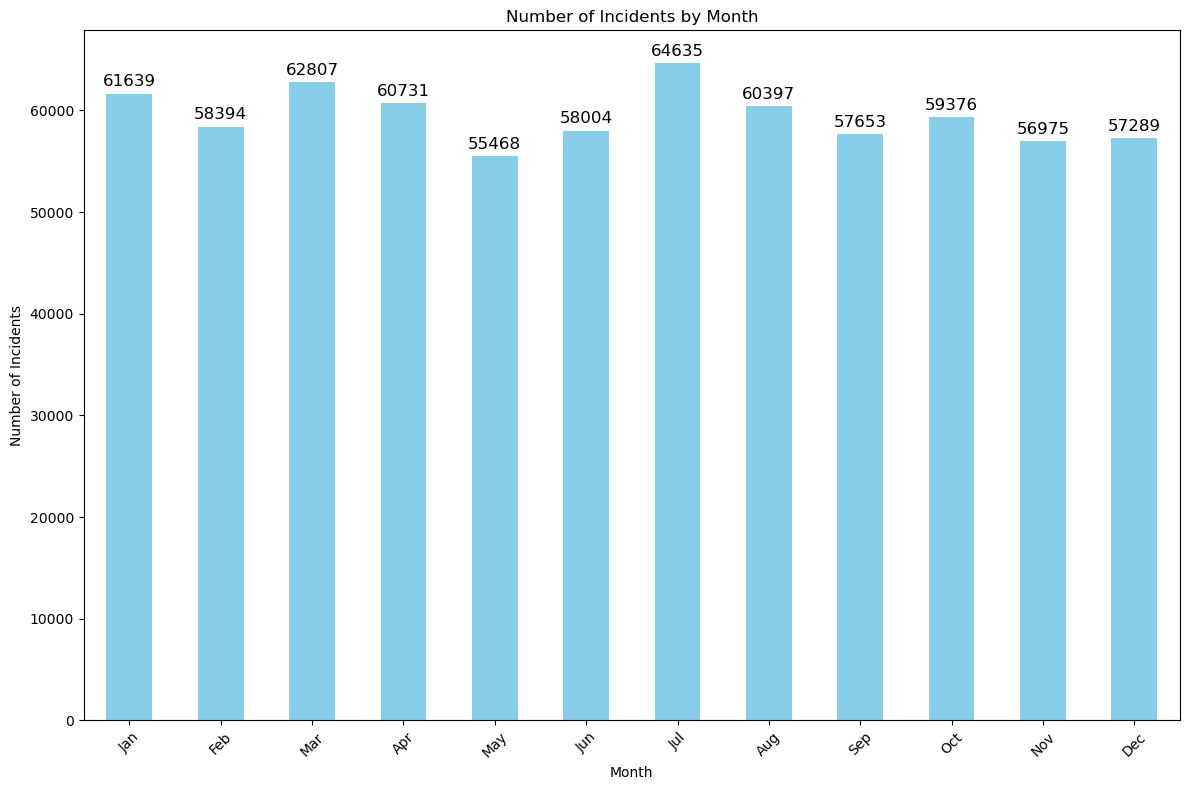

In [42]:
# Group by ProperCase and count the number of incidents
proper_case_counts = df['ProperCase'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = proper_case_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Incidents by Proper Case')
plt.xlabel('Proper Case')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')

# Add the figures to each of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=6, padding=2)

plt.tight_layout()

# Show the plot
plt.show()

# Convert DateOfCall to datetime if it's not already
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], errors='coerce')

# Extract the month from DateOfCall
df['Month'] = df['DateOfCall'].dt.month

# Group by Month and count the number of incidents
monthly_counts = df['Month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = monthly_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Add the figures to each of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3)

plt.tight_layout()

# Show the plot
plt.show()

# Convert DateOfCall to datetime
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], errors='coerce')

# Extract year and month from DateOfCall
df['Year'] = df['DateOfCall'].dt.year
df['Month'] = df['DateOfCall'].dt.month

# Group by year and month and count the number of incidents
incident_counts_by_month_year = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

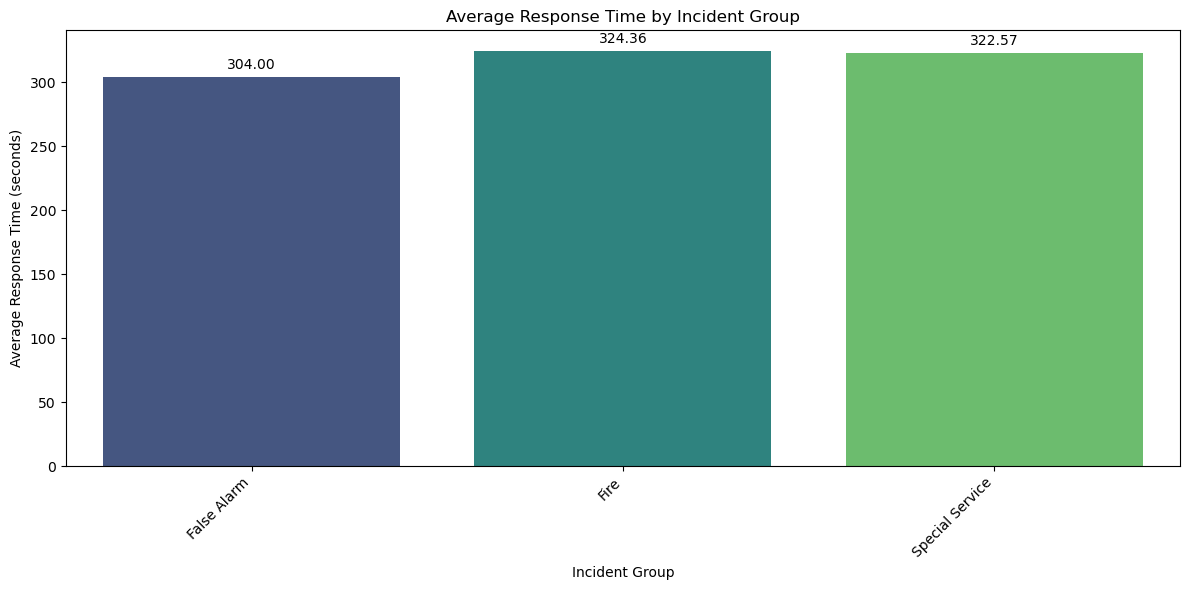

In [43]:
# Group by IncidentGroup and calculate the average response time
average_response_time = df.groupby('IncidentGroup')['FirstPumpArriving_AttendanceTime'].mean().reset_index()

# Plot the average response time for each incident group
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='IncidentGroup', y='FirstPumpArriving_AttendanceTime', data=average_response_time, palette='viridis')

# Annotate each bar with the response time
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Customize the plot
plt.title('Average Response Time by Incident Group')
plt.xlabel('Incident Group')
plt.ylabel('Average Response Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

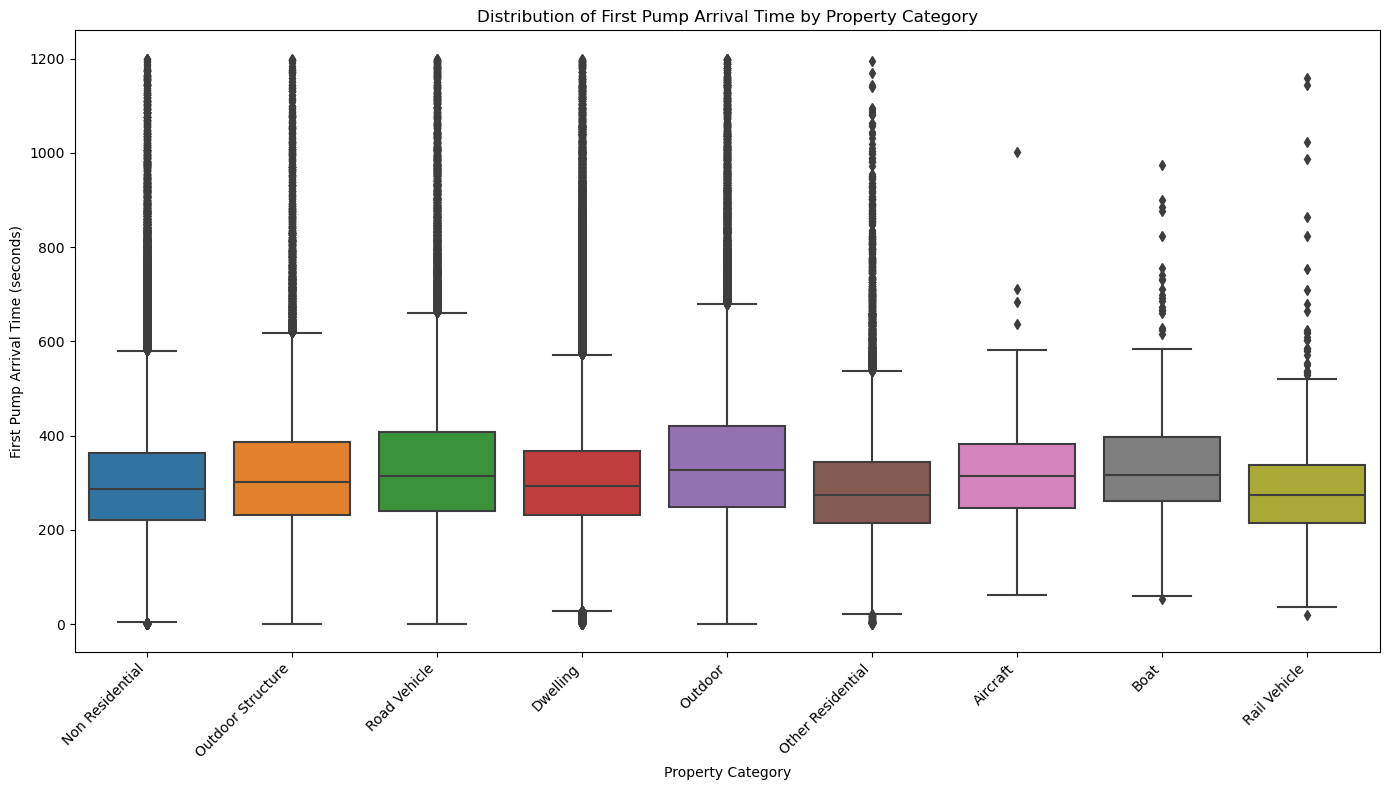

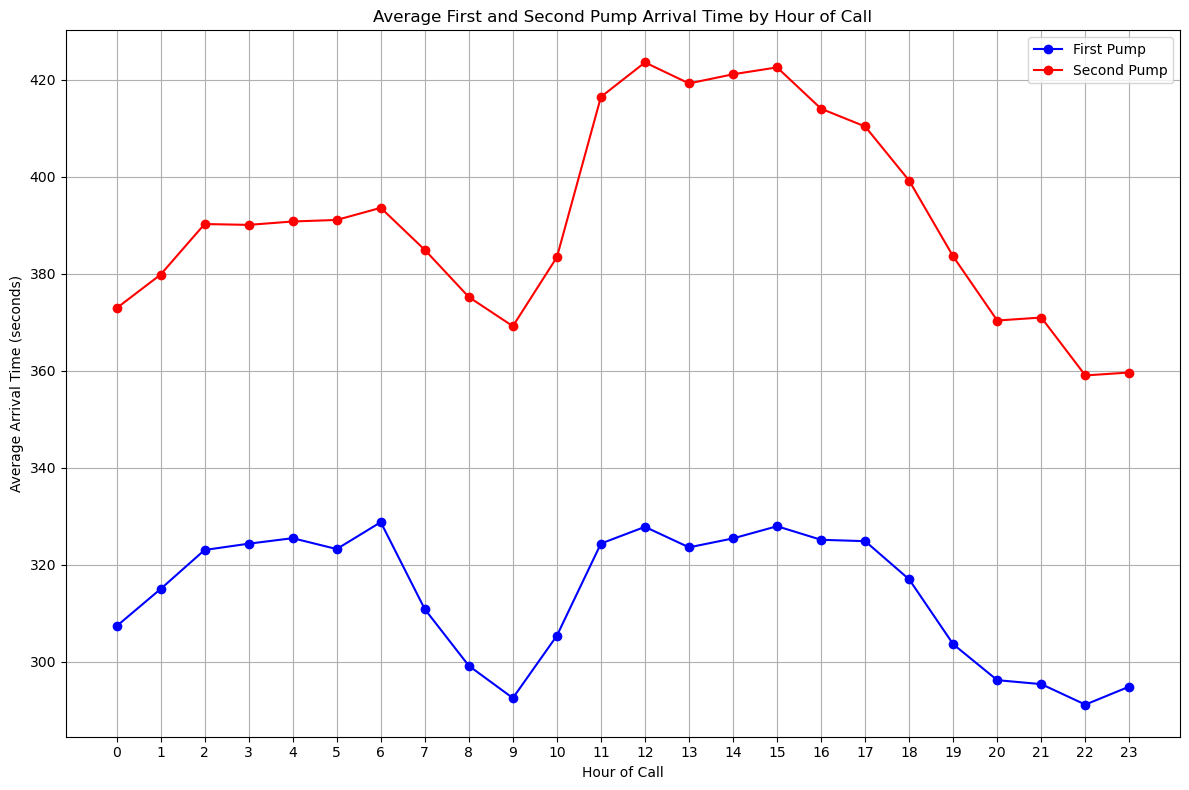

In [44]:
#Box Plot of Response Times by Property Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='PropertyCategory', y='FirstPumpArriving_AttendanceTime', data=df)
plt.title('Distribution of First Pump Arrival Time by Property Category')
plt.xlabel('Property Category')
plt.ylabel('First Pump Arrival Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Multi-line Plot of Average Response Times for First and Second Pumps

df['FirstPumpArriving_AttendanceTime'] = pd.to_numeric(df['FirstPumpArriving_AttendanceTime'], errors='coerce')
df['SecondPumpArriving_AttendanceTime'] = pd.to_numeric(df['SecondPumpArriving_AttendanceTime'], errors='coerce')

avg_response_time_by_hour_first = df.groupby('HourOfCall')['FirstPumpArriving_AttendanceTime'].mean().sort_index()
avg_response_time_by_hour_second = df.groupby('HourOfCall')['SecondPumpArriving_AttendanceTime'].mean().sort_index()

plt.figure(figsize=(12, 8))
plt.plot(avg_response_time_by_hour_first.index, avg_response_time_by_hour_first.values, marker='o', linestyle='-', color='b', label='First Pump')
plt.plot(avg_response_time_by_hour_second.index, avg_response_time_by_hour_second.values, marker='o', linestyle='-', color='r', label='Second Pump')
plt.title('Average First and Second Pump Arrival Time by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Average Arrival Time (seconds)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



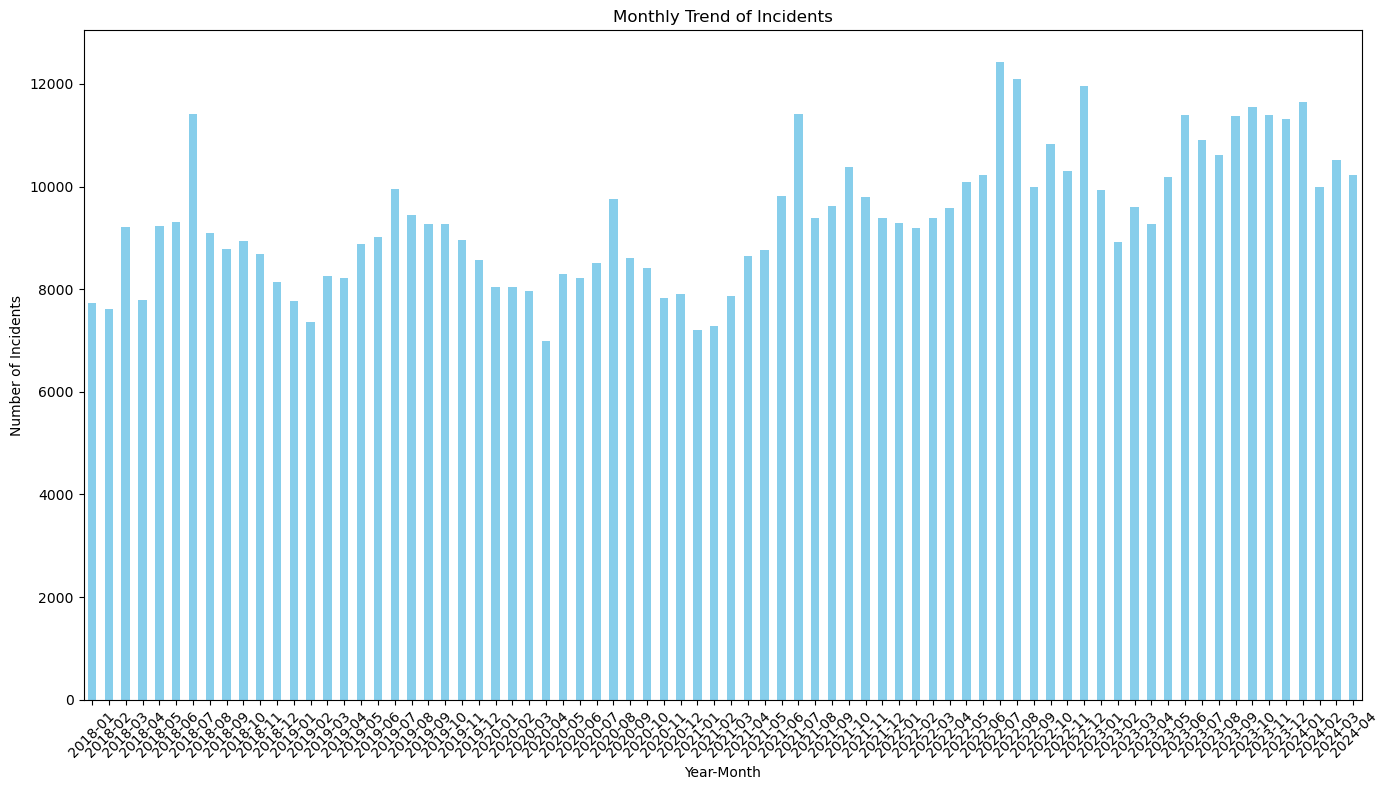

In [45]:
# Extract year and month from DateOfCall
df['YearMonth'] = df['DateOfCall'].dt.to_period('M')

# Group by YearMonth and count the number of incidents
monthly_trend = df['YearMonth'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
monthly_trend.plot(kind='bar', color='skyblue')
plt.title('Monthly Trend of Incidents')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


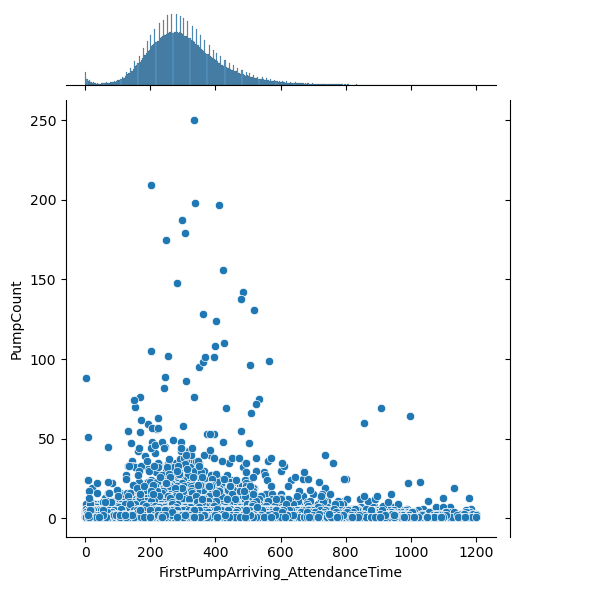

In [46]:
sns.jointplot(x = 'FirstPumpArriving_AttendanceTime', y='PumpCount', data = df)

C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


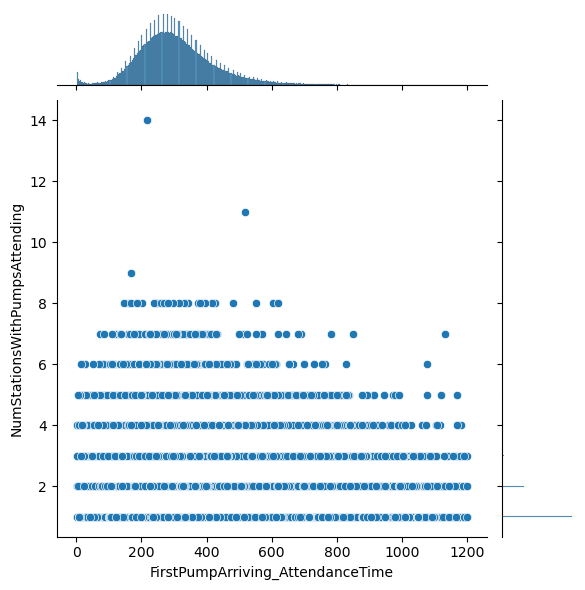

In [47]:
sns.jointplot( x = 'FirstPumpArriving_AttendanceTime', y='NumStationsWithPumpsAttending', data = df)

In [48]:
Data = df.copy()

In [49]:
# Define the columns that contain outliers and are numerical
numerical_cols = [
    'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime',
    'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
    'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'
]

# Function to cap outliers using IQR method
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Cap outliers in the numerical columns
capped_df = cap_outliers_iqr(df.copy(), numerical_cols)

# Display the capped dataframe
print(capped_df.head())

    IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
0  000008-01012018 2018-01-01     2018   00:04:25           0   
1  000009-01012018 2018-01-01     2018   00:04:30           0   
2  000010-01012018 2018-01-01     2018   00:04:34           0   
3  000011-01012018 2018-01-01     2018   00:04:58           0   
4  000014-01012018 2018-01-01     2018   00:07:47           0   

     IncidentGroup StopCodeDescription SpecialServiceType   PropertyCategory  \
0      False Alarm                 AFA                NaN    Non Residential   
1      False Alarm                 AFA                NaN    Non Residential   
2             Fire      Secondary Fire                NaN  Outdoor Structure   
3  Special Service     Special Service                RTC       Road Vehicle   
4             Fire        Primary Fire                NaN       Road Vehicle   

                       PropertyType  ...  \
0                           Mosque   ...   
1                 Pub/wine bar/bar   ...

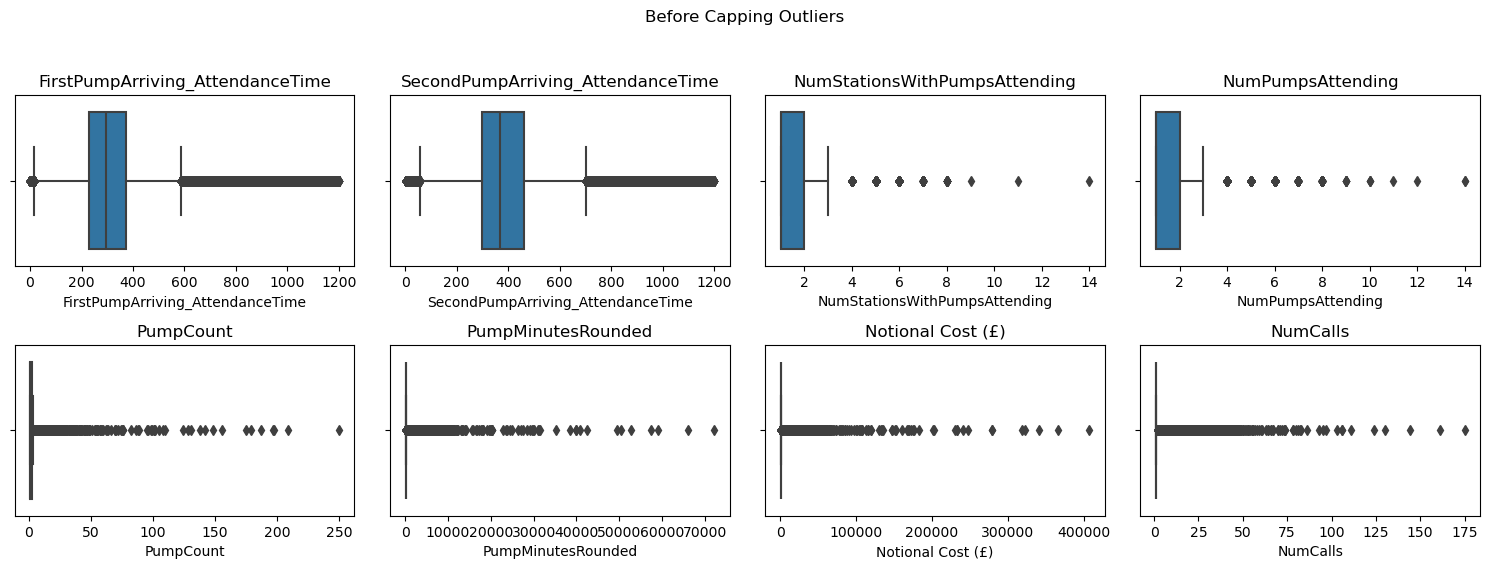

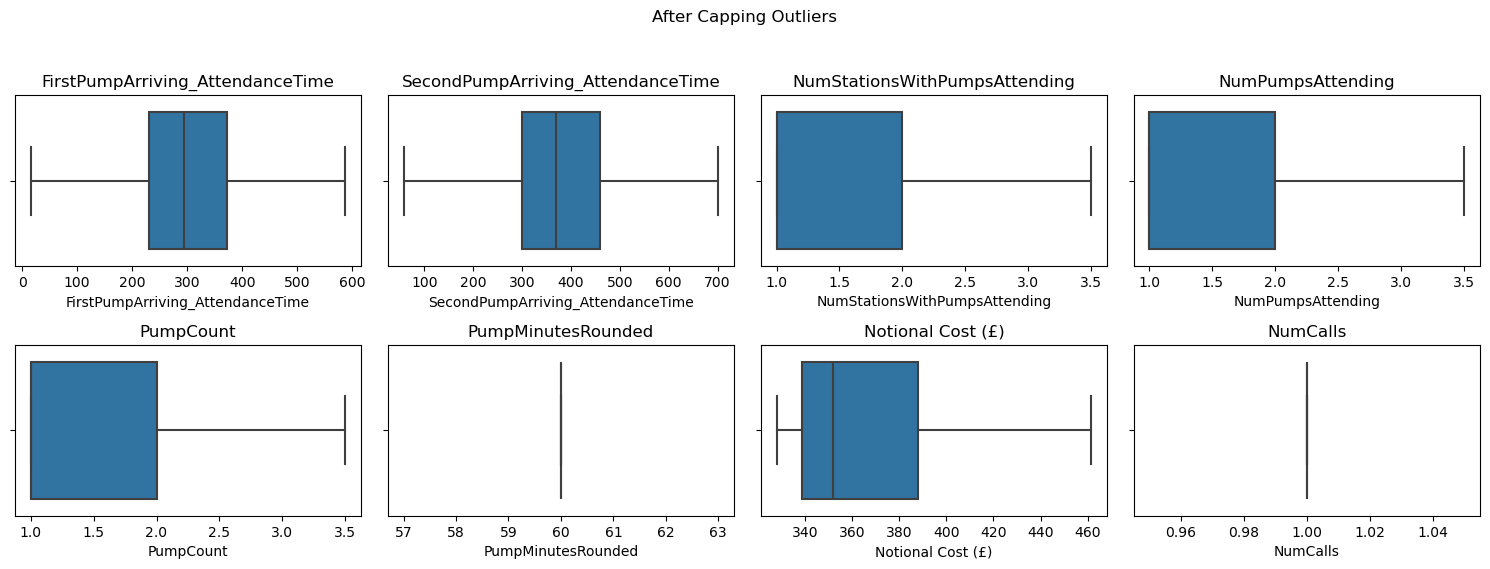

In [50]:
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot boxplots before capping outliers
plot_boxplots(df, numerical_cols, "Before Capping Outliers")

# Plot boxplots after capping outliers
plot_boxplots(capped_df, numerical_cols, "After Capping Outliers")

# CAPPING OUTLIERS AND REMOVING NULL VALUES FOR SECOND PUMP ATTENDANCE TIME

In [51]:
# Standardize categorical variables
capped_df['IncidentGroup'] = capped_df['IncidentGroup'].astype('category')
capped_df['StopCodeDescription'] = capped_df['StopCodeDescription'].astype('category')
capped_df['SpecialServiceType'] = capped_df['SpecialServiceType'].astype('category')
capped_df['PropertyCategory'] = capped_df['PropertyCategory'].astype('category')
capped_df['PropertyType'] = capped_df['PropertyType'].astype('category')

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
capped_df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']] = scaler.fit_transform(
    capped_df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']]
)

# Encode categorical variables
label_encoders = {}
for column in ['IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType']:
    label_encoders[column] = LabelEncoder()
    capped_df[column] = label_encoders[column].fit_transform(capped_df[column])

In [53]:
columns = ['SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation']
capped_df.dropna(subset=columns, inplace=True)

In [107]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in capped_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    capped_df[column] = le.fit_transform(capped_df[column].astype(str))
    label_encoders[column] = le



num_cols = capped_df.select_dtypes(include=['float64', 'int64']).columns
capped_df['NumCalls'].fillna(capped_df['NumCalls'].median(), inplace=True)

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
capped_df[num_cols] = imputer_num.fit_transform(capped_df[num_cols])

capped_df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year,YearMonth
7,22,2018-01-01,2018.0,768,0.0,2,8,13,2,103,...,53,2.0,2.0,2.0,60.0,328.0,1.0,1,2018,2018-01
19,41,2018-01-01,2018.0,1863,0.0,1,6,21,2,103,...,50,1.0,2.0,3.5,60.0,461.5,1.0,1,2018,2018-01
22,43,2018-01-01,2018.0,2185,0.0,1,7,21,6,118,...,0,3.0,3.5,3.5,60.0,328.0,1.0,1,2018,2018-01
26,47,2018-01-01,2018.0,2408,0.0,0,0,21,3,53,...,17,2.0,2.0,2.0,60.0,328.0,1.0,1,2018,2018-01
34,61,2018-01-01,2018.0,3518,1.0,0,3,21,2,103,...,100,2.0,2.0,2.0,60.0,328.0,1.0,1,2018,2018-01


In [108]:
capped_df_copy = capped_df.copy()

In [109]:


# Separate features (X) and target (y)
X = capped_df_copy.drop([ 'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation', 'DateOfCall', 'CalYear', 'YearMonth'], axis=1)
y = capped_df_copy['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(X.dtypes)
print(y.dtypes)

# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

X_norm.head()

IncidentNumber                             int32
TimeOfCall                                 int32
HourOfCall                               float64
IncidentGroup                              int32
StopCodeDescription                        int32
SpecialServiceType                         int32
PropertyCategory                           int32
PropertyType                               int32
AddressQualifier                           int32
Postcode_full                              int32
Postcode_district                          int32
UPRN                                     float64
USRN                                     float64
IncGeo_BoroughCode                         int32
IncGeo_BoroughName                         int32
ProperCase                                 int32
IncGeo_WardCode                            int32
IncGeo_WardName                            int32
IncGeo_WardNameNew                         int32
Easting_m                                float64
Northing_m          

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,IncidentStationGround,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year
0,0.000084,0.009716,0.000000,1.0,1.000,0.619048,0.250,0.361404,0.0,1.000000,...,0.235294,0.240385,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000156,0.023568,0.000000,0.5,0.750,1.000000,0.250,0.361404,0.0,1.000000,...,0.480392,0.490385,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000164,0.027642,0.000000,0.5,0.875,1.000000,0.750,0.414035,0.0,0.903177,...,0.196078,0.201923,0.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000179,0.030463,0.000000,0.0,0.000,1.000000,0.375,0.185965,0.0,0.308242,...,0.450980,0.461538,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000233,0.044505,0.043478,0.0,0.375,1.000000,0.250,0.361404,0.0,1.000000,...,0.568627,0.576923,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

In [58]:


import xgboost as xgb
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time)

#Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time)

# XGBoost (Added)
start_time = time.time()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time)


Linear Regression Evaluation Metrics:
  MSE: 0.8117787825068268
  RMSE: 0.9009876705631585
  MAE: 0.699028644014672
  R^2: 0.04661485144571109
  Time Taken: 0.27 seconds

Random Forest Evaluation Metrics:
  MSE: 0.4427800262863506
  RMSE: 0.6654171821394084
  MAE: 0.4643033231957305
  R^2: 0.4799816030738224
  Time Taken: 378.80 seconds

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.7173032652985623
  RMSE: 0.8469375805208801
  MAE: 0.6499913658990505
  R^2: 0.15757064007841926
  Time Taken: 75.83 seconds

XGBoost Evaluation Metrics:
  MSE: 0.5158399145617348
  RMSE: 0.7182199625196551
  MAE: 0.5322926909324968
  R^2: 0.3941771771171718
  Time Taken: 1.30 seconds



In [113]:
# Function to print evaluation metrics and time taken (no changes needed)
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")


# MLP (Modified with Timing)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp)

C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 566us/step - loss: 0.7532
Epoch 2/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 645us/step - loss: 0.6634
Epoch 3/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 660us/step - loss: 0.6394
Epoch 4/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 605us/step - loss: 0.6301
Epoch 5/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 602us/step - loss: 0.6272
Epoch 6/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 637us/step - loss: 0.6269
Epoch 7/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 631us/step - loss: 0.6249
Epoch 8/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 637us/step - loss: 0.6189
Epoch 9/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 653us/step - loss: 0.6177
Epoch 10/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 684us/step - loss: 0.6149
Epoch 11/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - loss: 0.6078
Epoch 12/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 726us/step - loss: 0.6083
Epoch 13/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 701us/step - loss: 0.6087
Epoch 14/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 664us/step - loss: 0.6059
E

X_train shape: (209760, 1, 36)
X_test shape: (52441, 1, 36)
y_train shape: (209760,)
y_test shape: (52441,)
Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5244/5244 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.7341 - val_loss: 0.7832
Epoch 2/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6855 - val_loss: 0.7601
Epoch 3/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6599 - val_loss: 0.6997
Epoch 4/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6317 - val_loss: 0.6679
Epoch 5/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6112 - val_loss: 0.6569
Epoch 6/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6033 - val_loss: 0.6448
Epoch 7/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.6001 - val_loss: 0.6413
Epoch 8/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5932 - val_loss: 0.6433
Epoch 9/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5902 - val_loss: 0.6318
Epoch 10/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5851 - val_loss: 0.6339
Epoch 11/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5821 - val_loss: 0.6292
Epoch 12/50
5244/5244 ━━━━━━━━━━━━━━━━━━━

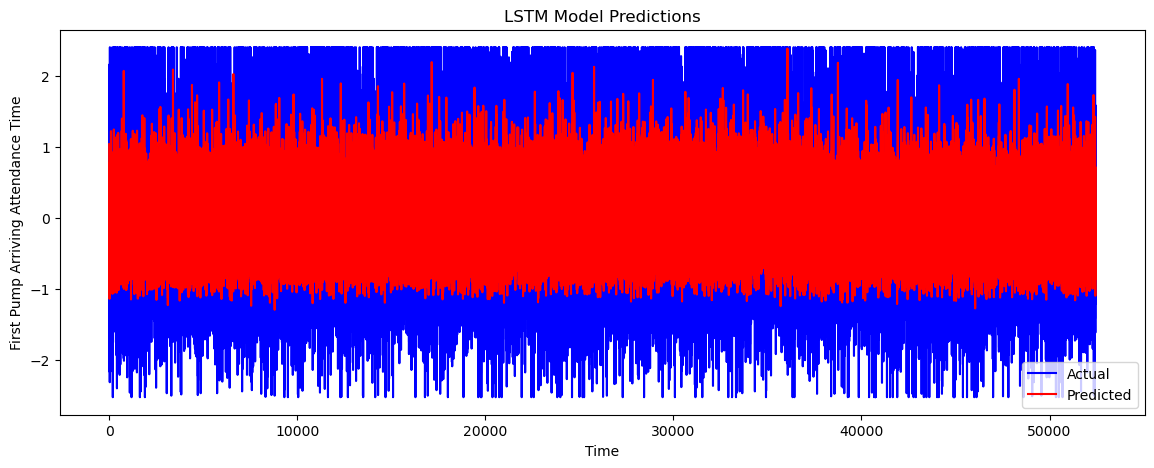

In [63]:

# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# Training the model with early stopping
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = capped_df.drop([ 'FirstPumpArriving_AttendanceTime', 'DateOfCall', 'CalYear', 'YearMonth'], axis=1)
y = capped_df['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(X.dtypes)
print(y.dtypes)


IncidentNumber                              int32
TimeOfCall                                  int32
HourOfCall                                float64
IncidentGroup                               int32
StopCodeDescription                         int32
SpecialServiceType                          int32
PropertyCategory                            int32
PropertyType                                int32
AddressQualifier                            int32
Postcode_full                               int32
Postcode_district                           int32
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                          int32
IncGeo_BoroughName                          int32
ProperCase                                  int32
IncGeo_WardCode                             int32
IncGeo_WardName                             int32
IncGeo_WardNameNew                          int32
Easting_m                                 float64


In [65]:
# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

X_norm.head()

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year
0,0.000084,0.009716,0.000000,1.0,1.000,0.619048,0.250,0.361404,0.0,1.000000,...,0.390528,0.519608,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000156,0.023568,0.000000,0.5,0.750,1.000000,0.250,0.361404,0.0,1.000000,...,0.233696,0.490196,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000164,0.027642,0.000000,0.5,0.875,1.000000,0.750,0.414035,0.0,0.903177,...,0.449534,0.000000,0.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000179,0.030463,0.000000,0.0,0.000,1.000000,0.375,0.185965,0.0,0.308242,...,0.713509,0.166667,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000233,0.044505,0.043478,0.0,0.375,1.000000,0.250,0.361404,0.0,1.000000,...,0.469720,0.980392,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

In [29]:

import xgboost as xgb
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time)

#Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time)

# XGBoost (Added)
start_time = time.time()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time)



Linear Regression Evaluation Metrics:
  MSE: 0.4676786255838413
  RMSE: 0.6838703280475337
  MAE: 0.5161507612968406
  R^2: 0.45073970207620384
  Time Taken: 0.30 seconds

Random Forest Evaluation Metrics:
  MSE: 0.3904075610997655
  RMSE: 0.6248260246658789
  MAE: 0.45185532123204913
  R^2: 0.5414899001346005
  Time Taken: 439.58 seconds

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.43918286792055333
  RMSE: 0.6627087353585687
  MAE: 0.488566265722574
  R^2: 0.4842062483058134
  Time Taken: 73.32 seconds

XGBoost Evaluation Metrics:
  MSE: 0.33914834709056363
  RMSE: 0.5823644452493332
  MAE: 0.412314202263159
  R^2: 0.6016907509279976
  Time Taken: 1.31 seconds



In [31]:
# Function to print evaluation metrics and time taken 
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")


# MLP (Modified with Timing)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp)

Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 600us/step - loss: 0.5177
Epoch 2/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 572us/step - loss: 0.4181
Epoch 3/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 3s 529us/step - loss: 0.4051
Epoch 4/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step - loss: 0.4036
Epoch 5/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 560us/step - loss: 0.3996
Epoch 6/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 546us/step - loss: 0.3936
Epoch 7/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 548us/step - loss: 0.3911
Epoch 8/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 544us/step - loss: 0.3919
Epoch 9/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 562us/step - loss: 0.3879
Epoch 10/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 571us/step - loss: 0.3882
Epoch 11/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 551us/step - loss: 0.3851
Epoch 12/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 4s 610us/step - loss: 0.3862
Epoch 13/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 692us/step - loss: 0.3844
Epoch 14/50
6555/6555 ━━━━━━━━━━━━━━━━━━━━ 5s 706us/step - loss: 0.3877
Epoch 15/50


X_train shape: (209760, 1, 38)
X_test shape: (52441, 1, 38)
y_train shape: (209760,)
y_test shape: (52441,)
Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5244/5244 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.4925 - val_loss: 0.4663
Epoch 2/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.4100 - val_loss: 0.4492
Epoch 3/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4042 - val_loss: 0.4392
Epoch 4/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3950 - val_loss: 0.4240
Epoch 5/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3851 - val_loss: 0.4224
Epoch 6/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3772 - val_loss: 0.4052
Epoch 7/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3743 - val_loss: 0.4023
Epoch 8/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3675 - val_loss: 0.4016
Epoch 9/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3669 - val_loss: 0.3993
Epoch 10/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3634 - val_loss: 0.3928
Epoch 11/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3630 - val_loss: 0.3939
Epoch 12/50
5244/5244 ━━━━━━━━━━━━━━━━━━

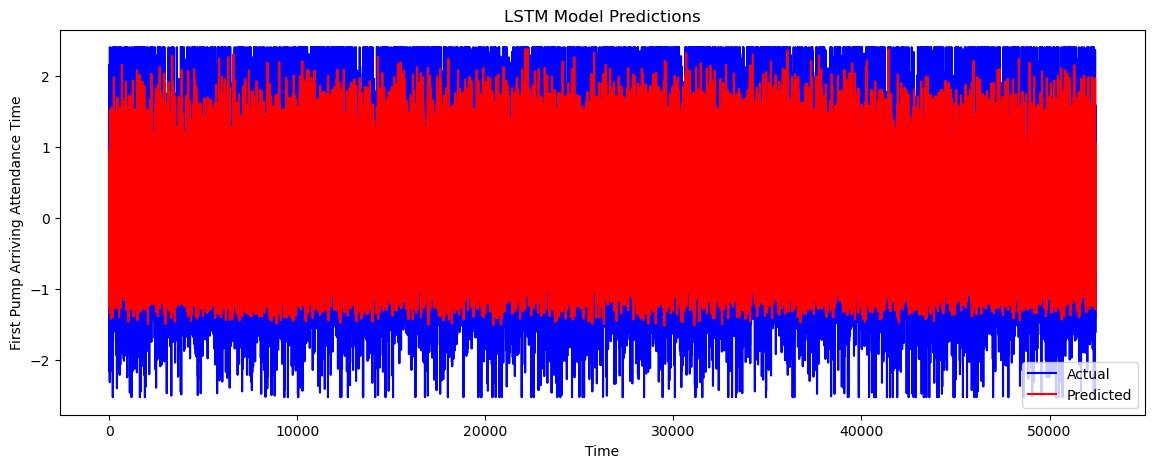

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# Training the model with early stopping
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)




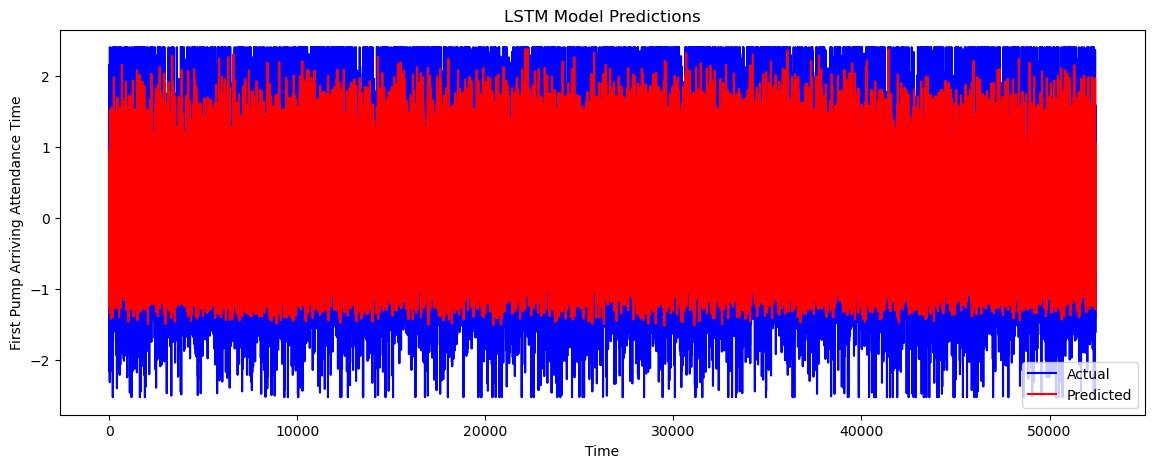

In [69]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()

# REMOVING ALL THE NULL VALUES

In [70]:
columns_to_check = ['SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation', 'SpecialServiceType','Postcode_full',
                    'Easting_m', 'Northing_m', 'Latitude', 'Longitude', 'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew']
df.dropna(subset=columns_to_check, inplace=True)

In [71]:
# Check the structure of the dataset
df.info()

# Get basic statistics of the dataset
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16043 entries, 71 to 713331
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          16043 non-null  object        
 1   DateOfCall                              16043 non-null  datetime64[ns]
 2   CalYear                                 16043 non-null  int64         
 3   TimeOfCall                              16043 non-null  object        
 4   HourOfCall                              16043 non-null  int64         
 5   IncidentGroup                           16043 non-null  object        
 6   StopCodeDescription                     16043 non-null  object        
 7   SpecialServiceType                      16043 non-null  object        
 8   PropertyCategory                        16043 non-null  object        
 9   PropertyType                            16043 non-nul

In [72]:
# Standardize categorical variables
df['IncidentGroup'] = df['IncidentGroup'].astype('category')
df['StopCodeDescription'] = df['StopCodeDescription'].astype('category')
df['SpecialServiceType'] = df['SpecialServiceType'].astype('category')
df['PropertyCategory'] = df['PropertyCategory'].astype('category')
df['PropertyType'] = df['PropertyType'].astype('category')

In [73]:
#Convert DateOfCall to datetime 
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], errors='coerce')

# Extract year and month from DateOfCall
df['Year'] = df['DateOfCall'].dt.year
df['Month'] = df['DateOfCall'].dt.month


# Derive DayOfWeek from CalYear and Month
df['Date'] = pd.to_datetime(df['CalYear'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
df['DayOfWeek'] = df['Date'].dt.day_name()

In [74]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']] = scaler.fit_transform(
    df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']]
)

# Encode categorical variables
label_encoders = {}
for column in ['IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'DayOfWeek']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [75]:
dataframe = df.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in dataframe.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataframe[column] = le.fit_transform(dataframe[column].astype(str))
    label_encoders[column] = le

from sklearn.impute import SimpleImputer

num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
dataframe['NumCalls'].fillna(dataframe['NumCalls'].median(), inplace=True)

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
dataframe[num_cols] = imputer_num.fit_transform(dataframe[num_cols])

dataframe.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year,YearMonth,Date,DayOfWeek
71,3,2018-01-01,2018.0,1268,2.0,0,0,13,7,104,...,2.0,2.0,134.0,733.0,1.0,1,2018,2018-01,2018-01-01,1
81,6,2018-01-01,2018.0,1494,3.0,0,0,13,7,26,...,2.0,2.0,60.0,328.0,1.0,1,2018,2018-01,2018-01-01,1
132,18,2018-01-01,2018.0,4211,9.0,0,0,17,0,136,...,4.0,4.0,251.0,1372.0,1.0,1,2018,2018-01,2018-01-01,1
263,29,2018-01-01,2018.0,12611,21.0,0,0,13,7,26,...,3.0,3.0,60.0,328.0,1.0,1,2018,2018-01,2018-01-01,1
272,31,2018-01-01,2018.0,13325,22.0,0,0,13,7,26,...,2.0,2.0,161.0,880.0,1.0,1,2018,2018-01,2018-01-01,1


In [77]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = dataframe.drop([ 'FirstPumpArriving_AttendanceTime', 'Date', 'DateOfCall', 'CalYear', 'YearMonth'], axis=1)
y = dataframe['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(X.dtypes)
print(y.dtypes)


IncidentNumber                              int32
TimeOfCall                                  int32
HourOfCall                                float64
IncidentGroup                               int32
StopCodeDescription                         int32
SpecialServiceType                          int32
PropertyCategory                            int32
PropertyType                                int32
AddressQualifier                            int32
Postcode_full                               int32
Postcode_district                           int32
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                          int32
IncGeo_BoroughName                          int32
ProperCase                                  int32
IncGeo_WardCode                             int32
IncGeo_WardName                             int32
IncGeo_WardNameNew                          int32
Easting_m                                 float64


In [78]:
# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

X_norm.head()

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year,DayOfWeek
0,0.000187,0.087660,0.086957,0.0,0.0,0.684211,1.0,0.502415,0.2,0.645579,...,0.237624,0.2,0.0,0.000000,0.011386,0.010616,0.0,0.0,0.0,0.166667
1,0.000374,0.103284,0.130435,0.0,0.0,0.684211,1.0,0.125604,0.2,0.490031,...,0.386139,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667
2,0.001122,0.291116,0.391304,0.0,0.0,0.894737,0.0,0.657005,0.8,0.859258,...,0.366337,0.6,0.4,0.086957,0.029389,0.027365,0.0,0.0,0.0,0.166667
3,0.001808,0.871829,0.913043,0.0,0.0,0.684211,1.0,0.125604,0.1,0.410196,...,0.287129,0.2,0.2,0.043478,0.000000,0.000000,0.0,0.0,0.0,0.166667
4,0.001932,0.921189,0.956522,0.0,0.0,0.684211,1.0,0.125604,0.2,0.053924,...,0.148515,0.0,0.0,0.000000,0.015541,0.014469,0.0,0.0,0.0,0.166667


In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

ValueError: Found input variables with inconsistent numbers of samples: [262201, 16043]

In [81]:

import xgboost as xgb
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time)

#Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time)

# XGBoost (Added)
start_time = time.time()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time)


Linear Regression Evaluation Metrics:
  MSE: 0.5836368216904193
  RMSE: 0.7639612697581071
  MAE: 0.5466730051059397
  R^2: 0.47255038596825927
  Time Taken: 0.08 seconds

Random Forest Evaluation Metrics:
  MSE: 0.6169762410461547
  RMSE: 0.78547835173616
  MAE: 0.5684640888973658
  R^2: 0.4424205805521224
  Time Taken: 33.14 seconds

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.5443569851273727
  RMSE: 0.7378055198542315
  MAE: 0.5179682527559241
  R^2: 0.5080487196313097
  Time Taken: 7.11 seconds

XGBoost Evaluation Metrics:
  MSE: 0.6553031274224901
  RMSE: 0.8095079538969893
  MAE: 0.5802588651566334
  R^2: 0.40778345575988395
  Time Taken: 0.51 seconds



In [82]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")


# MLP (Modified with Timing)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp)


Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - loss: 0.9280
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.6745
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.6022
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.5989
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.5402
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.5386
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.5143
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.5374
Epoch 9/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.5360
Epoch 10/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.5087
Epoch 11/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.5125
Epoch 12/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.5118
Epoch 13/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.4951
Epoch 14/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.5271
Epoch 15/50
402/402 ━━━━━━━━━━━━━━━━━━━━

# REMOVING NULL VALUES FOR SECOND PUMP ATTENDANCE TIME AND DROPPING LOCATION COLUMN

In [83]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df['NumCalls'].fillna(df['NumCalls'].median(), inplace=True)

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year,YearMonth,Date,DayOfWeek
71,3,2018-01-01,2018.0,1268,2.0,0,0,13,7,104,...,2.0,2.0,134.0,733.0,1.0,1,2018,2018-01,2018-01-01,1
81,6,2018-01-01,2018.0,1494,3.0,0,0,13,7,26,...,2.0,2.0,60.0,328.0,1.0,1,2018,2018-01,2018-01-01,1
132,18,2018-01-01,2018.0,4211,9.0,0,0,17,0,136,...,4.0,4.0,251.0,1372.0,1.0,1,2018,2018-01,2018-01-01,1
263,29,2018-01-01,2018.0,12611,21.0,0,0,13,7,26,...,3.0,3.0,60.0,328.0,1.0,1,2018,2018-01,2018-01-01,1
272,31,2018-01-01,2018.0,13325,22.0,0,0,13,7,26,...,2.0,2.0,161.0,880.0,1.0,1,2018,2018-01,2018-01-01,1


In [84]:
column_to_check = ['SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation']
df.dropna(subset=column_to_check, inplace=True)

In [85]:
# Drop the location-related columns
location_columns = [
    'Postcode_full', 'Postcode_district', 'Easting_m', 'Northing_m', 
    'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude'
]
df = df.drop(columns=location_columns)

In [86]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = df.drop([ 'FirstPumpArriving_AttendanceTime', 'Date', 'DateOfCall', 'CalYear', 'YearMonth'], axis=1)
y = df['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(X.dtypes)
print(y.dtypes)


IncidentNumber                              int32
TimeOfCall                                  int32
HourOfCall                                float64
IncidentGroup                               int32
StopCodeDescription                         int32
SpecialServiceType                          int32
PropertyCategory                            int32
PropertyType                                int32
AddressQualifier                            int32
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                          int32
IncGeo_BoroughName                          int32
ProperCase                                  int32
IncGeo_WardCode                             int32
IncGeo_WardName                             int32
IncGeo_WardNameNew                          int32
FRS                                         int32
IncidentStationGround                       int32
FirstPumpArriving_DeployedFromStation       int32


In [87]:
# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

X_norm.head()

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,UPRN,...,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Month,Year,DayOfWeek
0,0.000187,0.087660,0.086957,0.0,0.0,0.684211,1.0,0.502415,0.2,0.500081,...,0.237624,0.2,0.0,0.000000,0.011386,0.010616,0.0,0.0,0.0,0.166667
1,0.000374,0.103284,0.130435,0.0,0.0,0.684211,1.0,0.125604,0.2,0.000985,...,0.386139,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667
2,0.001122,0.291116,0.391304,0.0,0.0,0.894737,0.0,0.657005,0.8,0.050089,...,0.366337,0.6,0.4,0.086957,0.029389,0.027365,0.0,0.0,0.0,0.166667
3,0.001808,0.871829,0.913043,0.0,0.0,0.684211,1.0,0.125604,0.1,0.000975,...,0.287129,0.2,0.2,0.043478,0.000000,0.000000,0.0,0.0,0.0,0.166667
4,0.001932,0.921189,0.956522,0.0,0.0,0.684211,1.0,0.125604,0.2,0.029326,...,0.148515,0.0,0.0,0.000000,0.015541,0.014469,0.0,0.0,0.0,0.166667


In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

In [89]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time)

#Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time)

# XGBoost
start_time = time.time()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time)


Linear Regression Evaluation Metrics:
  MSE: 0.5848860136500666
  RMSE: 0.7647784082007458
  MAE: 0.5468952771206451
  R^2: 0.4714214547691291
  Time Taken: 0.02 seconds

Random Forest Evaluation Metrics:
  MSE: 0.6284110505978011
  RMSE: 0.7927238173524251
  MAE: 0.5753574578144466
  R^2: 0.43208660973260893
  Time Taken: 22.00 seconds

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.5533453101637064
  RMSE: 0.7438718371895163
  MAE: 0.5243971147847575
  R^2: 0.4999257082053433
  Time Taken: 4.16 seconds

XGBoost Evaluation Metrics:
  MSE: 0.7000055659037435
  RMSE: 0.8366633527911591
  MAE: 0.5950571432938491
  R^2: 0.3673845586256632
  Time Taken: 0.29 seconds



In [20]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")


# MLP (Modified with Timing)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))  # Increased dropout to 40%
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp)

C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 5s 680us/step - loss: 0.7938 - val_loss: 0.6506
Epoch 2/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 674us/step - loss: 0.6023 - val_loss: 0.6283
Epoch 3/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 687us/step - loss: 0.5937 - val_loss: 0.6395
Epoch 4/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 616us/step - loss: 0.5823 - val_loss: 0.6198
Epoch 5/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 655us/step - loss: 0.5829 - val_loss: 0.6400
Epoch 6/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 677us/step - loss: 0.5848 - val_loss: 0.6319
Epoch 7/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 660us/step - loss: 0.5788 - val_loss: 0.6153
Epoch 8/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 662us/step - loss: 0.5910 - val_loss: 0.6164
Epoch 9/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 659us/step - loss: 0.5812 - val_loss: 0.6300
Epoch 10/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 640us/step - loss: 0.5763 - val_loss: 0.5979
Epoch 11/100
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 678us/step - loss: 0.5811 - val_loss: 0.60

In [90]:

# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model with early stopping
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)

X_train shape: (12834, 1, 31)
X_test shape: (3209, 1, 31)
y_train shape: (12834,)
y_test shape: (3209,)
Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


321/321 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.8982 - val_loss: 0.5598
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5530 - val_loss: 0.5443
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5648 - val_loss: 0.5265
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5220 - val_loss: 0.5207
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5291 - val_loss: 0.5201
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5230 - val_loss: 0.5182
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5260 - val_loss: 0.5261
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5076 - val_loss: 0.5358
Epoch 9/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4943 - val_loss: 0.5172
Epoch 10/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5010 - val_loss: 0.5139
Epoch 11/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5169 - val_loss: 0.5171
Epoch 12/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

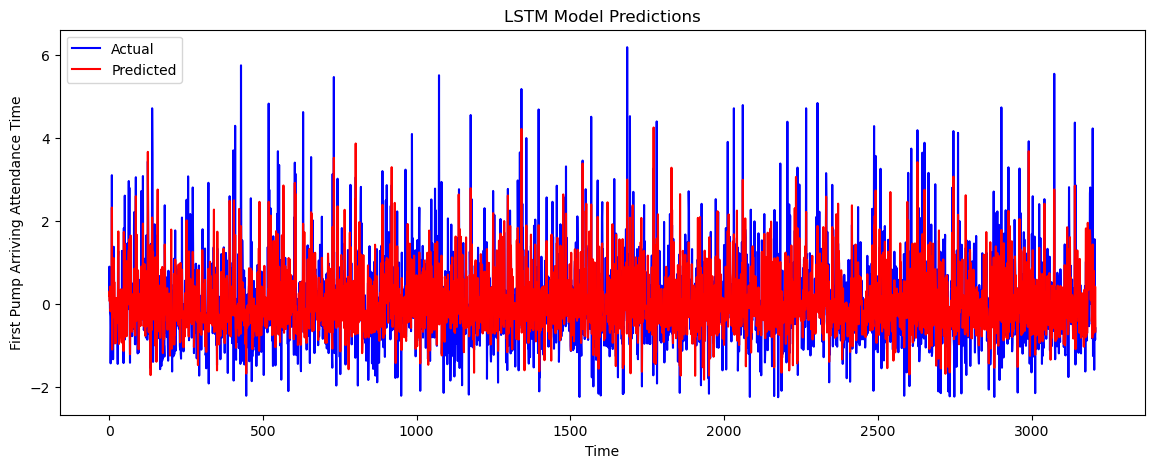

In [91]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import time

# Define parameter grid for Randomized Search
param_dist_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Perform Randomized Search
random_search_gbm = RandomizedSearchCV(estimator=gbm_reg, param_distributions=param_dist_gbm, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
start_time = time.time()
random_search_gbm.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

best_gbm = random_search_gbm.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_best_gbm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_gbm)
r2 = r2_score(y_test, y_pred_best_gbm)

print(f"Best Gradient Boosting Machine Evaluation Metrics:")
print(f"  MSE: {mse}")
print(f"  RMSE: {rmse}")
print(f"  MAE: {mae}")
print(f"  R^2: {r2}")
print(f"  Time Taken: {training_time} seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.7595938631978966
  RMSE: 0.8715468221489289
  MAE: 0.6451101482777225
  R^2: 0.3135328768253651
  Time Taken: 211.7147867679596 seconds


In [35]:
# Hyperparameter tuning for Gradient Boosting Machine
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search_gbm = GridSearchCV(estimator=gbm_reg, param_grid=param_grid_gbm, cv=3, n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

start_time = time.time()
best_gbm = grid_search_gbm.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_gbm, "Best Gradient Boosting Machine", start_time, end_time)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.7423400885196263
  RMSE: 0.8615916019319283
  MAE: 0.6354401728293846
  R^2: 0.32912561610505287
  Time Taken: 0.02 seconds



# RANDOMIZED SEARCH CROSS-VALIDATION

In [63]:


# Define the function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, best_params):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {end_time - start_time} seconds")
    print(f"  Best Parameters: {best_params}")


# Hyperparameter tuning for Linear Regression
param_distributions_lr = {}
random_search_lr = RandomizedSearchCV(estimator=LinearRegression(), param_distributions=param_distributions_lr, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_lr.fit(X_train, y_train)
    start_time = time.time()
    best_lr = random_search_lr.best_estimator_
    y_pred_best_lr = best_lr.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_lr, "Best Linear Regression", start_time, end_time, random_search_lr.best_params_)
except Exception as e:
    print(f"Linear Regression fitting failed: {e}")

# Hyperparameter tuning for Random Forest
param_distributions_rf = {
    'n_estimators': randint(50, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_distributions_rf, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_rf.fit(X_train, y_train)
    start_time = time.time()
    best_rf = random_search_rf.best_estimator_
    y_pred_best_rf = best_rf.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_rf, "Best Random Forest", start_time, end_time, random_search_rf.best_params_)
except Exception as e:
    print(f"Random Forest fitting failed: {e}")

# Hyperparameter tuning for Gradient Boosting
param_distributions_gbm = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 1.0),
    'min_samples_split': randint(2, 10)
}

random_search_gbm = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_distributions_gbm, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_gbm.fit(X_train, y_train)
    start_time = time.time()
    best_gbm = random_search_gbm.best_estimator_
    y_pred_best_gbm = best_gbm.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_gbm, "Best Gradient Boosting", start_time, end_time, random_search_gbm.best_params_)
except Exception as e:
    print(f"Gradient Boosting fitting failed: {e}")

# Hyperparameter tuning for XGBoost
param_distributions_xgb = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 1.0),
    'colsample_bytree': uniform(0.7, 1.0)
}

random_search_xgb = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_distributions_xgb, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_xgb.fit(X_train, y_train)
    start_time = time.time()
    best_xgb = random_search_xgb.best_estimator_
    y_pred_best_xgb = best_xgb.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_xgb, "Best XGBoost", start_time, end_time, random_search_xgb.best_params_)
except Exception as e:
    print(f"XGBoost fitting failed: {e}")

# Hyperparameter tuning for MLP
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive']
}

random_search_mlp = RandomizedSearchCV(estimator=MLPRegressor(max_iter=1000), param_distributions=param_distributions_mlp, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_mlp.fit(X_train, y_train)
    start_time = time.time()
    best_mlp = random_search_mlp.best_estimator_
    y_pred_best_mlp = best_mlp.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_mlp, "Best MLP", start_time, end_time, random_search_mlp.best_params_)
except Exception as e:
    print(f"MLP fitting failed: {e}")


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Linear Regression Evaluation Metrics:
  MSE: 0.5848860136500666
  RMSE: 0.7647784082007458
  MAE: 0.5468952771206451
  R^2: 0.4714214547691291
  Time Taken: 0.0 seconds
  Best Parameters: {}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Random Forest Evaluation Metrics:
  MSE: 0.5406088864588926
  RMSE: 0.7352611008743034
  MAE: 0.5146834897203366
  R^2: 0.5114359856888502
  Time Taken: 0.1874866485595703 seconds
  Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 298}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\caspe\anaconda3\Lib\site-packages\skl

Best Gradient Boosting Evaluation Metrics:
  MSE: 0.5911097446130059
  RMSE: 0.768836617632775
  MAE: 0.5560134216740505
  R^2: 0.46579688762010685
  Time Taken: 0.01505732536315918 seconds
  Best Parameters: {'learning_rate': 0.16306155223371177, 'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 163, 'subsample': 0.9998300357390456}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\caspe\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\caspe\an

Best XGBoost Evaluation Metrics:
  MSE: 0.8719736771519682
  RMSE: 0.9337953079513562
  MAE: 0.7243009571954157
  R^2: 0.21197196207130076
  Time Taken: 0.0 seconds
  Best Parameters: {'colsample_bytree': 0.7446651883019332, 'learning_rate': 0.2962453989506549, 'max_depth': 5, 'n_estimators': 148, 'subsample': 0.7576096026848758}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best MLP Evaluation Metrics:
  MSE: 0.5595814216852755
  RMSE: 0.7480517506732242
  MAE: 0.5301491934180834
  R^2: 0.4942899523844825
  Time Taken: 0.003998756408691406 seconds
  Best Parameters: {'activation': 'relu', 'alpha': 0.008075624685295177, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


# GRID SEARCH CROSS-VALIDATION

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, best_params):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {end_time - start_time} seconds")
    print(f"  Best Parameters: {best_params}")

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, replace the following line with code to load and preprocess your data

# Example: X_train, X_test, y_train, y_test = your_data_preprocessing_function()

# Hyperparameter tuning for Linear Regression
param_grid_lr = {}
grid_search_lr = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

start_time = time.time()
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_lr, "Best Linear Regression", start_time, end_time, grid_search_lr.best_params_)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

start_time = time.time()
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_rf, "Best Random Forest", start_time, end_time, grid_search_rf.best_params_)

# Hyperparameter tuning for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search_gbm = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gbm, cv=3, n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

start_time = time.time()
best_gbm = grid_search_gbm.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_gbm, "Best Gradient Boosting", start_time, end_time, grid_search_gbm.best_params_)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

start_time = time.time()
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_xgb, "Best XGBoost", start_time, end_time, grid_search_xgb.best_params_)

# Hyperparameter tuning for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(estimator=MLPRegressor(max_iter=1000), param_grid=param_grid_mlp, cv=3, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)

start_time = time.time()
best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_mlp, "Best MLP", start_time, end_time, grid_search_mlp.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Linear Regression Evaluation Metrics:
  MSE: 0.5848860136500666
  RMSE: 0.7647784082007458
  MAE: 0.5468952771206451
  R^2: 0.4714214547691291
  Time Taken: 0.0023713111877441406 seconds
  Best Parameters: {}
Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Random Forest Evaluation Metrics:
  MSE: 0.5415609706516764
  RMSE: 0.7359082623885103
  MAE: 0.515157329657724
  R^2: 0.510575559442002
  Time Taken: 0.06542229652404785 seconds
  Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Evaluation Metrics:
  MSE: 0.7452013801146282
  RMSE: 0.8632504735675667
  MAE: 0.6462091364302829
  R^2: 0.3265397834582284
  Time Taken: 0.01851940155029297 seconds
  Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best XGBoost Evaluation Metrics:
  MSE: 0.6248162769967845
  RMSE: 0.7904532098718966
  MAE: 0.5858560836220104
  R^2: 0.4353353114558758
  Time Taken: 0.0 seconds
  Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, '

In [34]:
from sklearn.model_selection import GridSearchCV


# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

start_time = time.time()
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_rf, "Best Random Forest", start_time, end_time)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Random Forest Evaluation Metrics:
  MSE: 0.5440934268808192
  RMSE: 0.7376268886644651
  MAE: 0.5155290053256751
  R^2: 0.5082869049038168
  Time Taken: 0.16 seconds



# REMOVING NULL VALUES FOR SECOND PUMP ATTENDANCE TIME

In [92]:
column_to_check = ['SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation']
df_copy.dropna(subset=column_to_check, inplace=True)

In [93]:
# Check the structure of the dataset
df_copy.info()

# Get basic statistics of the dataset
df_copy.describe()

# Check for missing values
missing_values = df_copy.isnull().sum()
missing_values[missing_values > 0]
print(df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 262201 entries, 7 to 713367
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          262201 non-null  object        
 1   DateOfCall                              262201 non-null  datetime64[ns]
 2   CalYear                                 262201 non-null  int64         
 3   TimeOfCall                              262201 non-null  object        
 4   HourOfCall                              262201 non-null  int64         
 5   IncidentGroup                           262201 non-null  object        
 6   StopCodeDescription                     262201 non-null  object        
 7   SpecialServiceType                      22527 non-null   object        
 8   PropertyCategory                        262201 non-null  object        
 9   PropertyType                            26

In [94]:
# Standardize categorical variables
df_copy['IncidentGroup'] = df_copy['IncidentGroup'].astype('category')
df_copy['StopCodeDescription'] = df_copy['StopCodeDescription'].astype('category')
df_copy['SpecialServiceType'] = df_copy['SpecialServiceType'].astype('category')
df_copy['PropertyCategory'] = df_copy['PropertyCategory'].astype('category')
df_copy['PropertyType'] = df_copy['PropertyType'].astype('category')

In [95]:
#Convert DateOfCall to datetime if it's not already
df_copy['DateOfCall'] = pd.to_datetime(df_copy['DateOfCall'], errors='coerce')

# Extract year and month from DateOfCall
df_copy['Year'] = df_copy['DateOfCall'].dt.year
df_copy['Month'] = df_copy['DateOfCall'].dt.month


# Derive DayOfWeek from CalYear and Month
df_copy['Date'] = pd.to_datetime(df_copy['CalYear'].astype(str) + '-' + df_copy['Month'].astype(str), format='%Y-%m')
df_copy['DayOfWeek'] = df_copy['Date'].dt.day_name()

In [96]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
df_copy[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']] = scaler.fit_transform(
    df_copy[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']]
)

# Encode categorical variables
label_encoders = {}
for column in ['IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'DayOfWeek']:
    label_encoders[column] = LabelEncoder()
    df_copy[column] = label_encoders[column].fit_transform(df_copy[column])

In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in df_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))
    label_encoders[column] = le

from sklearn.impute import SimpleImputer

num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
df_copy['NumCalls'].fillna(df_copy['NumCalls'].median(), inplace=True)

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
df_copy[num_cols] = imputer_num.fit_transform(df_copy[num_cols])

df_copy.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Year,Month,Date,DayOfWeek
7,22,2018-01-01,2018.0,768,0.0,2,7,12,2,100,...,2.0,2.0,2.0,60.0,328.0,1.0,2018,1,2018-01-01,1
19,41,2018-01-01,2018.0,1863,0.0,1,5,20,2,100,...,1.0,2.0,4.0,345.0,1886.0,2.0,2018,1,2018-01-01,1
22,43,2018-01-01,2018.0,2185,0.0,1,6,20,6,115,...,3.0,4.0,4.0,60.0,328.0,1.0,2018,1,2018-01-01,1
26,47,2018-01-01,2018.0,2408,0.0,0,0,20,3,52,...,2.0,2.0,2.0,60.0,328.0,1.0,2018,1,2018-01-01,1
34,61,2018-01-01,2018.0,3518,1.0,0,3,20,2,100,...,2.0,2.0,2.0,60.0,328.0,1.0,2018,1,2018-01-01,1


In [98]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
features = df_copy.drop([ 'FirstPumpArriving_AttendanceTime', 'Date', 'DateOfCall', 'CalYear'], axis=1)
target = df_copy['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(features.dtypes)
print(target.dtypes)


IncidentNumber                              int32
TimeOfCall                                  int32
HourOfCall                                float64
IncidentGroup                               int32
StopCodeDescription                         int32
SpecialServiceType                          int32
PropertyCategory                            int32
PropertyType                                int32
AddressQualifier                            int32
Postcode_full                               int32
Postcode_district                           int32
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                          int32
IncGeo_BoroughName                          int32
ProperCase                                  int32
IncGeo_WardCode                             int32
IncGeo_WardName                             int32
IncGeo_WardNameNew                          int32
Easting_m                                 float64


In [99]:
# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(features)
# Transform training data
X_norm = norm.transform(features)

X_norm = pd.DataFrame(norm.transform(features), columns=features.columns)

X_norm.head()

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,Year,Month,DayOfWeek
0,0.000084,0.009716,0.000000,1.0,1.000000,0.6,0.250,0.359712,0.0,1.000000,...,0.519608,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.166667
1,0.000156,0.023568,0.000000,0.5,0.714286,1.0,0.250,0.359712,0.0,1.000000,...,0.490196,0.000000,0.000000,0.010204,0.004835,0.004577,0.005747,0.0,0.0,0.166667
2,0.000164,0.027642,0.000000,0.5,0.857143,1.0,0.750,0.413669,0.0,0.903177,...,0.000000,0.153846,0.166667,0.010204,0.000000,0.000000,0.000000,0.0,0.0,0.166667
3,0.000179,0.030463,0.000000,0.0,0.000000,1.0,0.375,0.187050,0.0,0.308242,...,0.166667,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.166667
4,0.000233,0.044505,0.043478,0.0,0.428571,1.0,0.250,0.359712,0.0,1.000000,...,0.980392,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.166667


In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=42, shuffle = False)

In [28]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, val_loss):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds")
    print(f"  Validation Loss (MSE): {val_loss}\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
val_loss_lr = -cross_val_score(lin_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time, val_loss_lr)

# Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
val_loss_rf = -cross_val_score(rf_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time, val_loss_rf)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
val_loss_gbm = -cross_val_score(gbm_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time, val_loss_gbm)

# XGBoost
start_time = time.time()
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
val_loss_xgb = -cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time, val_loss_xgb)

# Huber Regression
start_time = time.time()
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)
y_pred_huber = huber_reg.predict(X_test)
end_time = time.time()
val_loss_huber = -cross_val_score(huber_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_huber, "Huber Regression", start_time, end_time, val_loss_huber)



Linear Regression Evaluation Metrics:
  MSE: 0.604119495118406
  RMSE: 0.7772512432401804
  MAE: 0.5702320787265677
  R^2: 0.43849592986199937
  Time Taken: 0.51 seconds
  Validation Loss (MSE): 0.5629566380836971

Random Forest Evaluation Metrics:
  MSE: 0.4984730024865942
  RMSE: 0.7060262052407079
  MAE: 0.4913623336762456
  R^2: 0.5366899727424395
  Time Taken: 486.44 seconds
  Validation Loss (MSE): 0.46084721383986477

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.5544247632046821
  RMSE: 0.7445970475395952
  MAE: 0.5321922919094275
  R^2: 0.48468512663424335
  Time Taken: 73.92 seconds
  Validation Loss (MSE): 0.5065875838723117

XGBoost Evaluation Metrics:
  MSE: 0.43561864305877834
  RMSE: 0.660014123378264
  MAE: 0.4506493481274005
  R^2: 0.5951104986976863
  Time Taken: 1.21 seconds
  Validation Loss (MSE): 0.4054467022294926



C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

Huber Regression Evaluation Metrics:
  MSE: 0.611234793284353
  RMSE: 0.7818150633521671
  MAE: 0.5613157661808419
  R^2: 0.43188255467263936
  Time Taken: 6.46 seconds
  Validation Loss (MSE): 0.5768902363425651



C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, val_loss):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds")
    print(f"  Validation Loss (MSE): {val_loss}\n")

# MLP (Modified with Timing and Validation Loss)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model with validation split
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

# Get the final validation loss from the training history
val_loss_mlp = history.history['val_loss'][-1]

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp, val_loss_mlp)

C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 5s 748us/step - loss: 0.6894 - val_loss: 0.5958
Epoch 2/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 672us/step - loss: 0.5277 - val_loss: 0.5742
Epoch 3/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 665us/step - loss: 0.5104 - val_loss: 0.5730
Epoch 4/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 3s 655us/step - loss: 0.5071 - val_loss: 0.5578
Epoch 5/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 688us/step - loss: 0.5031 - val_loss: 0.5678
Epoch 6/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 727us/step - loss: 0.5062 - val_loss: 0.5472
Epoch 7/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 701us/step - loss: 0.4944 - val_loss: 0.5377
Epoch 8/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 730us/step - loss: 0.4899 - val_loss: 0.5354
Epoch 9/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 737us/step - loss: 0.4908 - val_loss: 0.5528
Epoch 10/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 696us/step - loss: 0.4904 - val_loss: 0.5471
Epoch 11/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step - loss: 0.4805 - val_loss: 0.5341
Epoch 12

In [102]:
# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model with early stopping
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)

X_train shape: (209760, 1, 39)
X_test shape: (52441, 1, 39)
y_train shape: (209760,)
y_test shape: (52441,)
Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5244/5244 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6393 - val_loss: 0.6024
Epoch 2/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5326 - val_loss: 0.5883
Epoch 3/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5157 - val_loss: 0.6076
Epoch 4/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5120 - val_loss: 0.5692
Epoch 5/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5063 - val_loss: 0.5768
Epoch 6/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5026 - val_loss: 0.5753
Epoch 7/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.5034 - val_loss: 0.5610
Epoch 8/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4961 - val_loss: 0.5649
Epoch 9/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.4954 - val_loss: 0.5592
Epoch 10/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.4897 - val_loss: 0.5755
Epoch 11/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4912 - val_loss: 0.5527
Epoch 12/50
5244/5244 ━━━━━━━━━━━━━━━━━━━

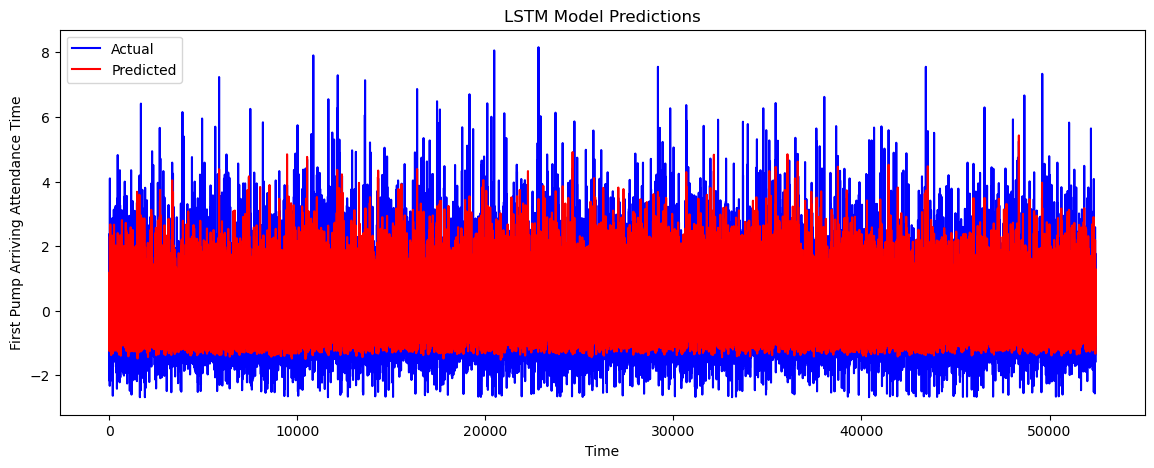

In [103]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()


X_train shape: (209760, 1, 39)
X_test shape: (52441, 1, 39)
y_train shape: (209760,)
y_test shape: (52441,)
Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5244/5244 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6386 - val_loss: 0.6145
Epoch 2/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5311 - val_loss: 0.5860
Epoch 3/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5156 - val_loss: 0.5825
Epoch 4/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5089 - val_loss: 0.5726
Epoch 5/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5029 - val_loss: 0.5671
Epoch 6/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5018 - val_loss: 0.5699
Epoch 7/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4989 - val_loss: 0.5675
Epoch 8/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4914 - val_loss: 0.5582
Epoch 9/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4828 - val_loss: 0.5553
Epoch 10/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4854 - val_loss: 0.5391
Epoch 11/50
5244/5244 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.4819 - val_loss: 0.5323
Epoch 12/50
5244/5244 ━━━━━━━━━━━━━━━━━━━

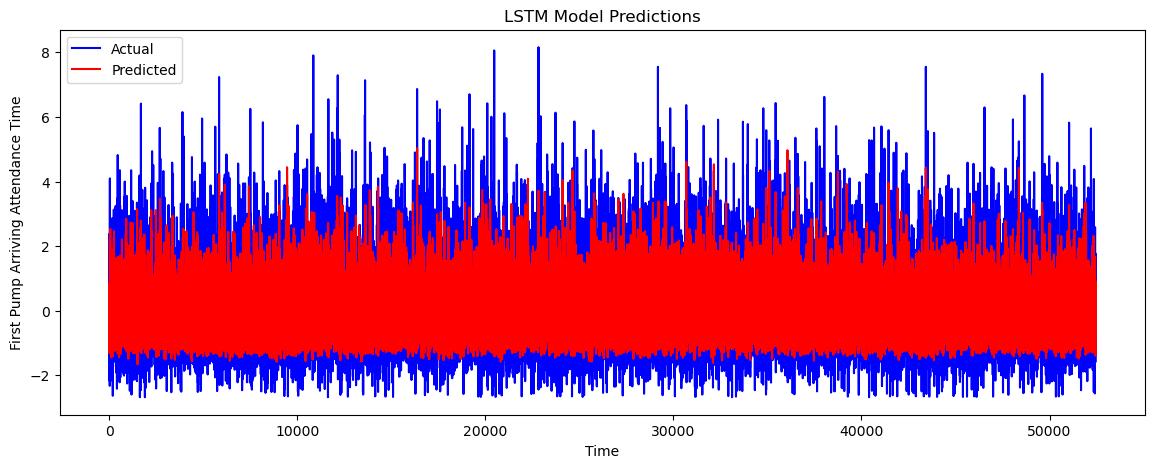

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=42, shuffle=False)

# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, best_params):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {end_time - start_time} seconds")
    print(f"  Best Parameters: {best_params}")

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, replace the following line with code to load and preprocess your data

# Hyperparameter tuning for Linear Regression
param_distributions_lr = {}
random_search_lr = RandomizedSearchCV(estimator=LinearRegression(), param_distributions=param_distributions_lr, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_lr.fit(X_train, y_train)
    start_time = time.time()
    best_lr = random_search_lr.best_estimator_
    y_pred_best_lr = best_lr.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_lr, "Best Linear Regression", start_time, end_time, random_search_lr.best_params_)
except Exception as e:
    print(f"Linear Regression fitting failed: {e}")

# Hyperparameter tuning for Random Forest
param_distributions_rf = {
    'n_estimators': randint(50, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_distributions_rf, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_rf.fit(X_train, y_train)
    start_time = time.time()
    best_rf = random_search_rf.best_estimator_
    y_pred_best_rf = best_rf.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_rf, "Best Random Forest", start_time, end_time, random_search_rf.best_params_)
except Exception as e:
    print(f"Random Forest fitting failed: {e}")

# Hyperparameter tuning for Gradient Boosting
param_distributions_gbm = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 1.0),
    'min_samples_split': randint(2, 10)
}

random_search_gbm = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_distributions_gbm, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_gbm.fit(X_train, y_train)
    start_time = time.time()
    best_gbm = random_search_gbm.best_estimator_
    y_pred_best_gbm = best_gbm.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_gbm, "Best Gradient Boosting", start_time, end_time, random_search_gbm.best_params_)
except Exception as e:
    print(f"Gradient Boosting fitting failed: {e}")

# Hyperparameter tuning for XGBoost
param_distributions_xgb = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 1.0),
    'colsample_bytree': uniform(0.7, 1.0)
}

random_search_xgb = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_distributions_xgb, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_xgb.fit(X_train, y_train)
    start_time = time.time()
    best_xgb = random_search_xgb.best_estimator_
    y_pred_best_xgb = best_xgb.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_xgb, "Best XGBoost", start_time, end_time, random_search_xgb.best_params_)
except Exception as e:
    print(f"XGBoost fitting failed: {e}")

# Hyperparameter tuning for MLP
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive']
}

random_search_mlp = RandomizedSearchCV(estimator=MLPRegressor(max_iter=1000), param_distributions=param_distributions_mlp, n_iter=10, cv=3, n_jobs=-1, verbose=2)
try:
    random_search_mlp.fit(X_train, y_train)
    start_time = time.time()
    best_mlp = random_search_mlp.best_estimator_
    y_pred_best_mlp = best_mlp.predict(X_test)
    end_time = time.time()
    print_evaluation_metrics(y_test, y_pred_best_mlp, "Best MLP", start_time, end_time, random_search_mlp.best_params_)
except Exception as e:
    print(f"MLP fitting failed: {e}")

C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Linear Regression Evaluation Metrics:
  MSE: 0.604119495118406
  RMSE: 0.7772512432401804
  MAE: 0.5702320787265677
  R^2: 0.43849592986199937
  Time Taken: 0.015611886978149414 seconds
  Best Parameters: {}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Evaluation Metrics:
  MSE: 0.46595595366321735
  RMSE: 0.6826096642029157
  MAE: 0.46887825542854666
  R^2: 0.5669132239547241
  Time Taken: 4.601547956466675 seconds
  Best Parameters: {'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 269}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\caspe\anaconda3\Lib\site-packages\skl

Best Gradient Boosting Evaluation Metrics:
  MSE: 0.4702289304377412
  RMSE: 0.6857324043952868
  MAE: 0.47708502214556536
  R^2: 0.5629416688735063
  Time Taken: 0.18008828163146973 seconds
  Best Parameters: {'learning_rate': 0.23552827382701538, 'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 235, 'subsample': 0.8787762996650101}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost fitting failed: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\caspe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\xgboost\cor

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {end_time - start_time} seconds")

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, replace the following line with code to load and preprocess your data

# Example: X_train, X_test, y_train, y_test = your_data_preprocessing_function()

# Hyperparameter tuning for Linear Regression
param_grid_lr = {}
grid_search_lr = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

start_time = time.time()
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_lr, "Best Linear Regression", start_time, end_time)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

start_time = time.time()
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_rf, "Best Random Forest", start_time, end_time)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

start_time = time.time()
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_xgb, "Best XGBoost", start_time, end_time)

# Hyperparameter tuning for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search_gbm = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gbm, cv=3, n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

start_time = time.time()
best_gbm = grid_search_gbm.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_gbm, "Best Gradient Boosting", start_time, end_time)

# Hyperparameter tuning for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(estimator=MLPRegressor(max_iter=1000), param_grid=param_grid_mlp, cv=3, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)

start_time = time.time()
best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)
end_time = time.time()
print_evaluation_metrics(y_test, y_pred_best_mlp, "Best MLP", start_time, end_time)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Linear Regression Evaluation Metrics:
  MSE: 0.604119495118406
  RMSE: 0.7772512432401804
  MAE: 0.5702320787265677
  R^2: 0.43849592986199937
  Time Taken: 0.0 seconds
Fitting 3 folds for each of 243 candidates, totalling 729 fits


exception calling callback for <Future at 0x210a89d4f50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\caspe\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\caspe\anaconda3\Lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\caspe\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\caspe\anaconda3\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\caspe\anaconda3\Lib\site-pack